In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
import math
import json
from math import floor
from sklearn.metrics import r2_score

In [2]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [3]:
dataset = pd.read_csv('/content/AQI_delhi.csv')

In [4]:
dataset.head()

,Date,Delhi
0,2015-01-01,472.0
1,2015-01-02,454.0
2,2015-01-03,143.0
3,2015-01-04,319.0
4,2015-01-05,325.0


In [5]:
aqi_arr = dataset['Delhi'].to_numpy()
print(aqi_arr)

[472. 454. 143. ... 233. 114. 101.]


2009


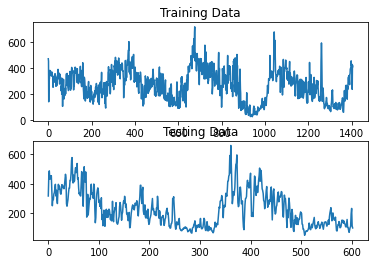

In [6]:
lengths=[0.7, 0.3]          
lookback=1                      

print(len(aqi_arr))

aqi_len=len(aqi_arr)
lim=[floor(aqi_len*lengths[0]),
     floor(aqi_len*(lengths[0]+lengths[1]))]

TrainingData=aqi_arr[:lim[0]]
TestData=aqi_arr[lim[0]:lim[1]]

fig, axs = plt.subplots(2)
axs[0].plot(TrainingData)
axs[0].set_title('Training Data')
axs[1].plot(TestData)
axs[1].set_title('Testing Data')

Xtrain,Ytrain=[],[]
Xtest,Ytest=[],[]


Xtraining=TrainingData[:-1]
Ytraining=TrainingData[1:]
for i in range(len(Xtraining)-lookback+1):
  Xtrain.append(Xtraining[i:i+lookback])
  Ytrain.append(Ytraining[i+lookback-1])

Xtesting=TestData[:-1]
Ytesting=TestData[1:]
for i in range(len(Xtesting)-lookback+1):
  Xtest.append(Xtesting[i:i+lookback])
  Ytest.append(Ytesting[i+lookback-1])

Xtrain=np.array(Xtrain)
Ytrain=np.array(Ytrain)
Xtest=np.array(Xtest)
Ytest=np.array(Ytest)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_X_train=sc.fit_transform(Xtrain)
sc_X_test=sc.fit_transform(Xtest)


In [8]:
from catboost import CatBoostRegressor
reg_catm= CatBoostRegressor(loss_function='RMSE')
reg_catm.fit(sc_X_train, Ytrain,eval_set=(sc_X_test, Ytest),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.053713
0:	learn: 113.4021298	test: 120.9296118	best: 120.9296118 (0)	total: 48.7ms	remaining: 48.6s
1:	learn: 109.1463971	test: 116.9337308	best: 116.9337308 (1)	total: 51.1ms	remaining: 25.5s
2:	learn: 105.0227322	test: 113.1887275	best: 113.1887275 (2)	total: 52.7ms	remaining: 17.5s
3:	learn: 101.1439936	test: 109.1777126	best: 109.1777126 (3)	total: 54.4ms	remaining: 13.5s
4:	learn: 97.4846820	test: 105.4318118	best: 105.4318118 (4)	total: 55.8ms	remaining: 11.1s
5:	learn: 94.1322418	test: 101.9436531	best: 101.9436531 (5)	total: 57.3ms	remaining: 9.49s
6:	learn: 90.9438762	test: 98.7048371	best: 98.7048371 (6)	total: 58.9ms	remaining: 8.35s
7:	learn: 87.9486120	test: 95.9784800	best: 95.9784800 (7)	total: 60.7ms	remaining: 7.53s
8:	learn: 85.2277819	test: 93.2012960	best: 93.2012960 (8)	total: 62.6ms	remaining: 6.89s
9:	learn: 82.7540863	test: 90.4945444	best: 90.4945444 (9)	total: 64.4ms	remaining: 6.37s
10:	learn: 80.3538161	test: 88.1048057	best: 88.104805

In [9]:
y_pred_catboost = reg_catm.predict(sc_X_test)

In [10]:
X1=np.arange(0,len(Ytest))

Text(0.5, 1.0, 'CAT Boost')

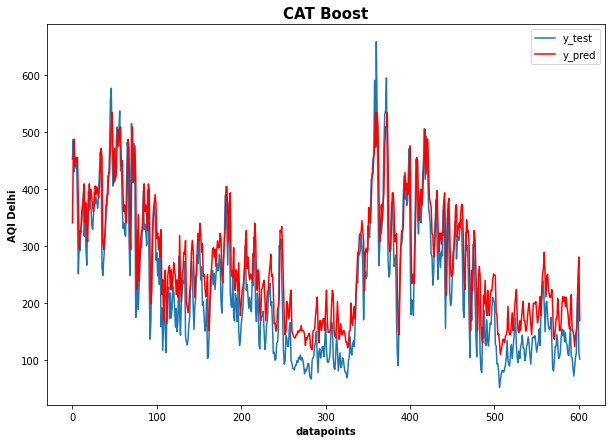

In [11]:
# plot forecasts against actual outcomes
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(Ytest,label = 'y_test')
ax.plot(y_pred_catboost, color='red',label = 'y_pred')
ax.legend()
plt.ylabel('AQI Delhi',fontweight='bold')
plt.xlabel('datapoints',fontweight='bold')
plt.title('CAT Boost',fontweight='bold',fontsize=15)

In [12]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,median_absolute_error,r2_score

print("R2 Score = ",r2_score(Ytest, y_pred_catboost))
print("Variance Score = ",explained_variance_score(Ytest, y_pred_catboost))
print("\nMean Absolute Error (MAE) = ",mean_absolute_error(Ytest, y_pred_catboost))
print("Mean Squared Error (MSE) = ",mean_squared_error(Ytest, y_pred_catboost))
print("Root Mean Squared Error (RMSE) = ",mean_squared_error(Ytest, y_pred_catboost,squared=False))
print("Mean Absolute Percentage Error (MAPE) = ",mean_absolute_percentage_error(Ytest, y_pred_catboost))
print("Meadian Relative Absolute Error (MRAE) = ",median_absolute_error(Ytest, y_pred_catboost))

R2 Score =  0.7167351908583527
Variance Score =  0.8283919026385154

Mean Absolute Error (MAE) =  51.989541785196714
Mean Squared Error (MSE) =  4030.759665429428
Root Mean Squared Error (RMSE) =  63.488263997603745
Mean Absolute Percentage Error (MAPE) =  0.3242173101523997
Meadian Relative Absolute Error (MRAE) =  46.36875620486444


In [13]:
catboost_res=[r2_score(Ytest, y_pred_catboost),
         explained_variance_score(Ytest, y_pred_catboost),
         mean_absolute_error(Ytest, y_pred_catboost),
         mean_absolute_percentage_error(Ytest, y_pred_catboost),
         mean_squared_error(Ytest, y_pred_catboost,squared=False)]
print("catboost_res =",catboost_res)

catboost_res = [0.7167351908583527, 0.8283919026385154, 51.989541785196714, 0.3242173101523997, 63.488263997603745]
